# Traitement des données Ville France

# Pandas

In [27]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [28]:
# chargement des données
df = pd.read_csv("correspondance-code-insee-code-postal.csv", sep=';', usecols=range(11))
df.head()

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
0,31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
1,11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
2,43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
3,78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
4,84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."


In [3]:
# type ou classe
type(df)

pandas.core.frame.DataFrame

In [4]:
# dimensions
df.shape

(36742, 11)

## Series

In [5]:
# on obtient un objet Series à partir d'une colonne du DataFrame
s_commune = df["Commune"]
s_commune

0                BOULOGNE-SUR-GESSE
1                           FEUILLA
2                        BESSAMOREL
3                PRUNAY-EN-YVELINES
4              MORIERES-LES-AVIGNON
5                    LAMOTTE-BULEUX
6                           MOUSTEY
7            SAINT-SATURNIN-DU-BOIS
                    ...            
36734                       BRAGEAC
36735                       ANCOURT
36736                     BUSSIARES
36737                     CHAVANNAZ
36738    NEEWILLER-PRES-LAUTERBOURG
36739       LACHAPELLE-SOUS-AUBENAS
36740                BAGE-LE-CHATEL
36741                  GUILBERVILLE
Name: Commune, Length: 36742, dtype: object

In [ ]:
# type de l'objet
type(s_commune)

In [ ]:
# accès à la variable d'instance "name" = nom de la colonne
s_commune.name

In [ ]:
# accès à la variable d'instance "values"
s_commune.values

In [ ]:
s_commune.values[99]

In [ ]:
# type de la variable "values"
type(s_commune.values)

#### Python vs NumPy

In [ ]:
%%time
# listes Python
len([i ** 2 for i in range(10_000_000)])

In [ ]:
%%time
# ndarray numpy
len(np.arange(10_000_000, dtype=int) ** 2)

In [ ]:
# dimension de l'objet, retourne un tuple avec un seul élément
s_commune.shape

In [ ]:
# taille de l'objet, ou bien len(s)
s_commune.size

In [ ]:
# index numérique par défaut
s_commune.index

In [ ]:
# tête
s_commune.head()

In [ ]:
# queue
s_commune.tail(3)  # ou bien s.tail(n=3)

In [ ]:
s_commune.unique()

Nombre de valeurs uniques d'un objet *Series*

In [ ]:
# nombre de valeurs uniques
s_commune.nunique()

In [ ]:
# nombre de départements
df["Département"].nunique()

In [ ]:
# liste des départements
df["Département"].unique()

In [ ]:
# nombre de statuts de commune
df["Statut"].nunique()

**Exercice 1**
- Combien de valeurs différentes comporte la colonne "Altitude Moyenne" ?
- Combien de communes se trouvent à une altitude inférieur à 850 mètres?

1652

{876.0}

**Exercice 2**

- Donner le décompte des différents statuts des communes.
- Quels sont les 10 noms de communes les plus fréquents ?

Statut
Commune simple          33421
Chef-lieu canton         2980
Sous-préfecture           240
Préfecture                 74
Préfecture de région       26
Capitale d'état             1
Name: count, dtype: int64

Commune
SAINTE-COLOMBE           14
SAINT-SAUVEUR            12
SAINTE-MARIE             11
BEAULIEU                 11
SAINT-REMY               10
SAINT-LOUP               10
LE PIN                   10
SAINT-SULPICE            10
                         ..
WALY                      1
SAINT-BLAISE-LA-ROCHE     1
PRADES-D'AUBRAC           1
AGON-COUTAINVILLE         1
OUGE                      1
QUOEUX-HAUT-MAINIL        1
SERMIERS                  1
GUILBERVILLE              1
Name: count, Length: 34130, dtype: int64

In [37]:
# population précision limitée
df["Population"].sum()

64500.00000000001

In [38]:
0.1 + 0.1 + 0.1

0.30000000000000004

In [39]:
# min
df['Altitude Moyenne'].min()

0.0

In [40]:
# index du min
df['Altitude Moyenne'].idxmin()

25402

In [41]:
# max
df['Altitude Moyenne'].max()

2713.0

In [42]:
# index du max
df['Altitude Moyenne'].idxmax()

6414

In [43]:
# opération avec un scalaire
df["Population"] * 1000

0        1600.0
1         100.0
2         400.0
3         800.0
4        7600.0
5         400.0
6         700.0
7         900.0
          ...  
36734     100.0
36735     700.0
36736     100.0
36737     200.0
36738     700.0
36739    1500.0
36740     800.0
36741    1000.0
Name: Population, Length: 36742, dtype: float64

In [44]:
# comparaison
df['Altitude Moyenne'] == 49

0        False
1        False
2        False
3        False
4         True
5        False
6         True
7        False
         ...  
36734    False
36735    False
36736    False
36737    False
36738    False
36739    False
36740    False
36741    False
Name: Altitude Moyenne, Length: 36742, dtype: bool

In [45]:
# exemple : appartenance à une liste de valeurs
df["Altitude Moyenne"].isin([49.0, 59.0])

0        False
1        False
2        False
3        False
4         True
5         True
6         True
7        False
         ...  
36734    False
36735    False
36736    False
36737    False
36738    False
36739    False
36740    False
36741    False
Name: Altitude Moyenne, Length: 36742, dtype: bool

In [46]:
# somme cumulée population
df["Population"].cumsum()

0            1.6
1            1.7
2            2.1
3            2.9
4           10.5
5           10.9
6           11.6
7           12.5
          ...   
36734    64495.0
36735    64495.7
36736    64495.8
36737    64496.0
36738    64496.7
36739    64498.2
36740    64499.0
36741    64500.0
Name: Population, Length: 36742, dtype: float64

In [48]:
# exemple : calcul de la densité en divisant la population par la superficie
df['den'] = df["Population"] / df["Superficie"]
df

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,den
0,31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852...",0.000648
1,11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996...",0.000041
2,43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674...",0.000538
3,78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610...",0.000294
4,84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176...",0.007294
5,80462,80150,LAMOTTE-BULEUX,SOMME,PICARDIE,Commune simple,59.0,613.0,0.4,"50.1865666179, 1.83564836965","{""type"": ""Polygon"", ""coordinates"": [[[1.849459...",0.000653
6,40200,40410,MOUSTEY,LANDES,AQUITAINE,Commune simple,49.0,6736.0,0.7,"44.3882918763, -0.750880080586","{""type"": ""Polygon"", ""coordinates"": [[[-0.71016...",0.000104
7,17394,17700,SAINT-SATURNIN-DU-BOIS,CHARENTE-MARITIME,POITOU-CHARENTES,Commune simple,45.0,2528.0,0.9,"46.1401428747, -0.665133364912","{""type"": ""Polygon"", ""coordinates"": [[[-0.66124...",0.000356
...,...,...,...,...,...,...,...,...,...,...,...,...
36734,15024,15700,BRAGEAC,CANTAL,AUVERGNE,Commune simple,555.0,1222.0,0.1,"45.2038604898, 2.26559675808","{""type"": ""Polygon"", ""coordinates"": [[[2.302124...",0.000082


In [ ]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['a', 'b', 'd'])
s1+s2

In [49]:
# startswith
df["Commune"].str.startswith("B")

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
         ...  
36734     True
36735    False
36736     True
36737    False
36738    False
36739    False
36740     True
36741    False
Name: Commune, Length: 36742, dtype: bool

In [50]:
df["Commune"].str.capitalize()

0                Boulogne-sur-gesse
1                           Feuilla
2                        Bessamorel
3                Prunay-en-yvelines
4              Morieres-les-avignon
5                    Lamotte-buleux
6                           Moustey
7            Saint-saturnin-du-bois
                    ...            
36734                       Brageac
36735                       Ancourt
36736                     Bussiares
36737                     Chavannaz
36738    Neewiller-pres-lauterbourg
36739       Lachapelle-sous-aubenas
36740                Bage-le-chatel
36741                  Guilberville
Name: Commune, Length: 36742, dtype: object

In [51]:
df["Commune"].str[0]

0        B
1        F
2        B
3        P
4        M
5        L
6        M
7        S
        ..
36734    B
36735    A
36736    B
36737    C
36738    N
36739    L
36740    B
36741    G
Name: Commune, Length: 36742, dtype: object

In [53]:
df['Altitude Moyenne'].describe()

count    36742.000000
mean       277.813810
std        290.435871
min          0.000000
25%        103.000000
50%        185.000000
75%        334.000000
max       2713.000000
Name: Altitude Moyenne, dtype: float64

<Axes: >

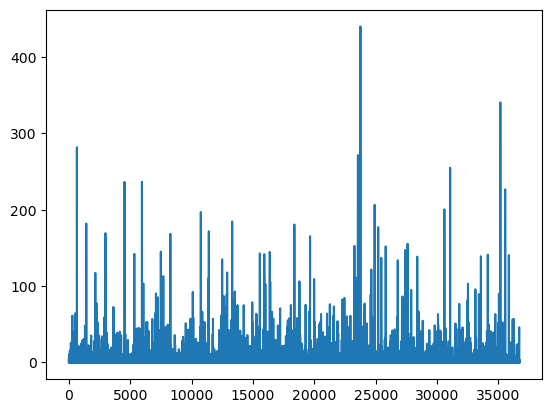

In [56]:
df['Population'].plot()

**Exercice 3**

- Calculez le minimum et le maximum des longueurs des noms des communes.
- Donnez le décompte des longueurs de noms des communes.
- Quelle est la commune dont le nom est le plus long ?

In [58]:
df['Commune'].str.len().min()

1

In [59]:
df['Commune'].str.len().max()

45

In [76]:
df['Commune'].str.len().value_counts()

Commune
8     3919
7     3883
6     3393
9     3193
10    2675
5     2084
11    1993
12    1505
13    1235
18    1230
16    1209
17    1177
19    1158
15    1152
20    1041
14    1035
21     981
22     841
4      757
23     699
24     546
25     346
26     217
3      159
27     107
29      66
28      54
30      23
2       15
31      10
32       9
35       7
40       4
34       4
38       3
37       2
33       2
41       2
36       2
45       1
1        1
43       1
44       1
Name: count, dtype: int64

In [81]:
df.loc[df['Commune'].str.len() == df['Commune'].str.len().max()]

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,den
16461,51513,51290,SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON,MARNE,CHAMPAGNE-ARDENNE,Chef-lieu canton,116.0,2204.0,0.6,"48.6129201202, 4.6490004853","{""type"": ""Polygon"", ""coordinates"": [[[4.681178...",0.000272


In [82]:
df.loc[df['Commune'].str.len() == df['Commune'].str.len().min()]

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,den
20352,80829,80190,Y,SOMME,PICARDIE,Commune simple,72.0,277.0,0.1,"49.8021266521, 2.98611736598","{""type"": ""Polygon"", ""coordinates"": [[[2.985775...",0.000361


#### méthode apply()

In [83]:
# series
s_superficie = df["Superficie"]
s_superficie

0        2470.0
1        2426.0
2         743.0
3        2717.0
4        1042.0
5         613.0
6        6736.0
7        2528.0
          ...  
36734    1222.0
36735    1252.0
36736     769.0
36737     321.0
36738     725.0
36739    1018.0
36740      86.0
36741    2224.0
Name: Superficie, Length: 36742, dtype: float64

In [84]:
# côtés des carrés de surface équivalente
s_superficie.apply(np.sqrt)

0        49.699095
1        49.254441
2        27.258026
3        52.124850
4        32.280025
5        24.758837
6        82.073138
7        50.279220
           ...    
36734    34.957117
36735    35.383612
36736    27.730849
36737    17.916473
36738    26.925824
36739    31.906112
36740     9.273618
36741    47.159304
Name: Superficie, Length: 36742, dtype: float64

In [85]:
# rayons des cercles de surface équivalente
# fonction standard
def rayon(surface):
    rayon = np.sqrt(surface / np.pi)
    return rayon

rayon(10)

1.7841241161527712

In [86]:
# rayons des cercles de surface équivalente
# fonction standard
df['Superficie'].apply(rayon)

0        28.039711
1        27.788843
2        15.378695
3        29.408297
4        18.212054
5        13.968678
6        46.304810
7        28.367012
           ...    
36734    19.722441
36735    19.963065
36736    15.645456
36737    10.108287
36738    15.191269
36739    18.001096
36740     5.232079
36741    26.606788
Name: Superficie, Length: 36742, dtype: float64

In [87]:
# rayons des cercles de surface équivalente
# lambda
s_superficie.apply(lambda x: np.sqrt(x / np.pi))

0        28.039711
1        27.788843
2        15.378695
3        29.408297
4        18.212054
5        13.968678
6        46.304810
7        28.367012
           ...    
36734    19.722441
36735    19.963065
36736    15.645456
36737    10.108287
36738    15.191269
36739    18.001096
36740     5.232079
36741    26.606788
Name: Superficie, Length: 36742, dtype: float64

**map()**

In [88]:
df['Statut'].unique()

array(['Chef-lieu canton', 'Commune simple', 'Sous-préfecture',
       'Préfecture', 'Préfecture de région', "Capitale d'état"],
      dtype=object)

In [89]:
# dico
dico = {'Chef-lieu canton': 'CLC', 'Commune simple': 'CS', 'Sous-préfecture': 'SP',
       'Préfecture': 'P', 'Préfecture de région': 'PR', "Capitale d'état": 'CDE'}
df['Statut'].map(dico)

0        CLC
1         CS
2         CS
3         CS
4         CS
5         CS
6         CS
7         CS
        ... 
36734     CS
36735     CS
36736     CS
36737     CS
36738     CS
36739     CS
36740    CLC
36741     CS
Name: Statut, Length: 36742, dtype: object

In [ ]:
# série
dico = {'Chef-lieu canton': 'CLC', 'Commune simple': 'CS', 'Sous-préfecture': 'SP',
       'Préfecture': 'P', 'Préfecture de région': 'PR', "Capitale d'état": 'CDE'}
s = pd.Series(dico)
print(s)
df['Statut'].map(s)

**combine()**

## Malplotlib

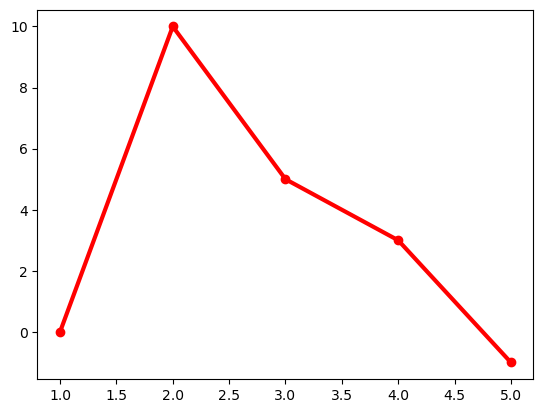

In [90]:
## Tracé de courbe avec matplotlib
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [0,10,5,3,-1]
plt.plot(x,y,
        marker ='o',
        c ='red',
        linewidth = 3)
plt.show()

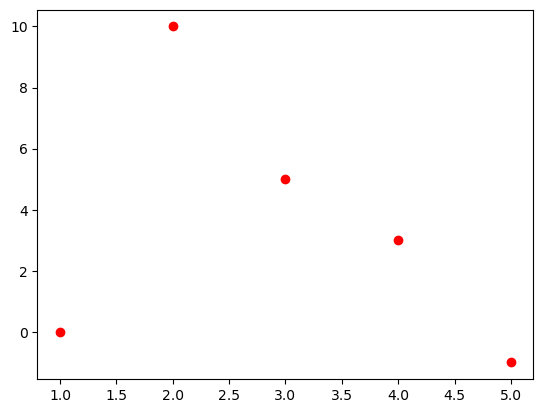

In [92]:
plt.scatter(x,y,
        marker ='o',
        c ='red',
        linewidth = 1)
plt.show()

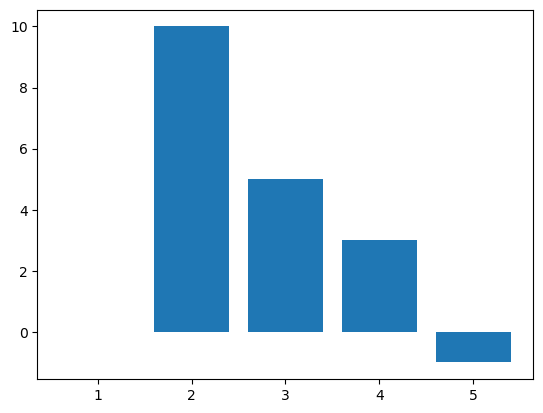

In [96]:
plt.bar(x,y)
plt.show()

In [97]:
df_1 = pd.read_csv("villes_france.csv", sep=',')
df_1.head()

/tmp/ipykernel_25121/204560854.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("villes_france.csv", sep=',')


,numero,dep,slug,nom,nom simple,nom_reel,nom soundex,nom meta,cp,num commune,...,densite_2010,surface,long_degre,lat_degre,long_grd,lat_grd,long_dms,lat_dms,altitude_min,altitude_max
0,1,1,ozan,OZAN,ozan,Ozan,O250,OSN,01190,284,...,93,6.60,4.91667,46.3833,2866.0,51546.0,45456.0,462330.0,170.0,205.0
1,2,1,cormoranche-sur-saone,CORMORANCHE-SUR-SAONE,cormoranche sur saone,Cormoranche-sur-Saône,C65652625,KRMRNXSRSN,01290,123,...,107,9.85,4.83333,46.2333,2772.0,51379.0,44953.0,461427.0,168.0,211.0
2,3,1,plagne-01,PLAGNE,plagne,Plagne,P425,PLKN,01130,298,...,20,6.20,5.73333,46.1833,3769.0,51324.0,54342.0,461131.0,560.0,922.0
3,4,1,tossiat,TOSSIAT,tossiat,Tossiat,T230,TST,01250,422,...,138,10.17,5.31667,46.1333,3309.0,51268.0,51854.0,460828.0,244.0,501.0
4,5,1,pouillat,POUILLAT,pouillat,Pouillat,P430,PLT,01250,309,...,14,6.23,5.43333,46.3333,3435.0,51475.0,52542.0,461938.0,333.0,770.0


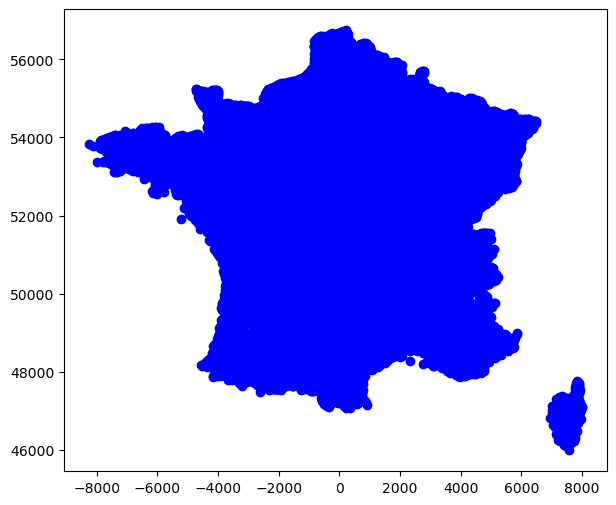

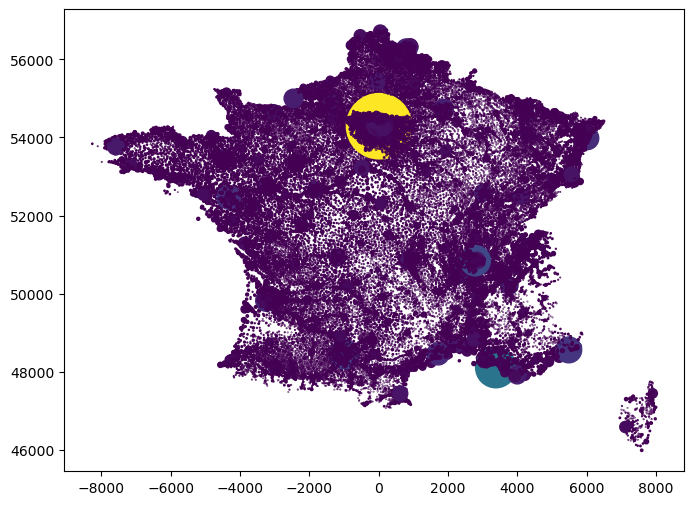

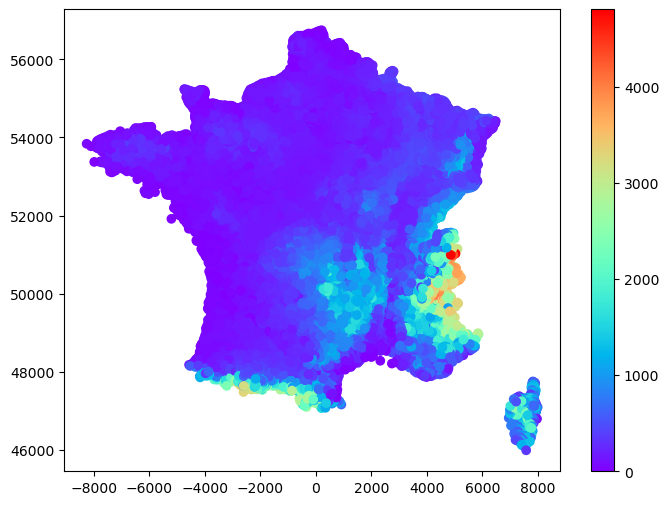